In [3]:
import json

In [4]:
object_name_list = ["-41710-SHD_Camera", "-41612-SHD_Boombox", "23468-SHD_CounterDrawer", "23782-SHD_CounterDrawer", "24078-SHD_Light", "24374-SHD_Cabinet", "24428-SHD_Refrigerator", "24640-SHD_Oven", "25794-SHD_Lightswitch", "28418-SHD_CounterSink", "28588-SHD_Toaster", "29242-SHD_ExtractorFan", "29452-SHD_Cabinet", "29826-SHD_Microwave", "30340-SHD_DishWasher", "31064-SHD_RubbishBin", "31700-SHD_CounterDrawer", "34768-SHD_CounterDrawer", "36362-SHD_CoffeeMachine", "36814-SHD_Cabinet"]

In [5]:
f = open("input_data-all-1011.json")
input_data = json.load(f)#["data"]
f.close()

In [6]:
f = open("availability.json")
availability_list = json.load(f)
f.close()

In [7]:
f = open("all_devices_0925.json")
device_info = json.load(f)["objects"]
f.close()

In [8]:
f = open("entity_temp.json")
entity_json = json.load(f)
f.close()

In [9]:
spacial_val_list = []
intent_list = []
correct_answer_list = []
utterance_list = []
availability_val_list = []
entity_list = []
training_data =[]

In [10]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

In [11]:
for i in input_data:
        cosine_distance_list = [i["cosine_distance"]]

        euclidean_distance_list = [i["euclidean_distance"]]

        intent = i["target_operation"]
        availability_val_list = [availability_list[intent]]
        correct_answer = i["target_object"]
        utterance = i["utterance"]
        #print(utterance)
        if "microwave" in utterance:
            #print("microwave")
            entity_list = [entity_json["microwave"]]
        elif "oven" in utterance:
            #print("oven")
            entity_list = [entity_json["oven"]]
        else:
            entity_list = [entity_json["no_entity"]]

        #print(spacial_val_list)
        #print(availability_val_list)
        #print(entity_list)
        #print(correct_answer)
        row = [cosine_distance_list, euclidean_distance_list, availability_val_list, entity_list, correct_answer]
        training_data.append(row)

In [12]:
def flatten(tlist):
    return [item for sublist in tlist for item in sublist]

In [13]:
flatten(training_data)

[[{'-41710-SHD_Camera': 0.787069237669655,
   '-41612-SHD_Boombox': 0.764702593693388,
   '23468-SHD_CounterDrawer': 0.663064592008563,
   '23782-SHD_CounterDrawer': 0.7239094732746385,
   '24078-SHD_Light': 0.8354662102095589,
   '24374-SHD_Cabinet': 0.7950538207734431,
   '24428-SHD_Refrigerator': 0.7820250131918169,
   '24640-SHD_Oven': 0.6818937536599778,
   '25794-SHD_Lightswitch': 0.7966345316365812,
   '28418-SHD_CounterSink': 0.7015165173782306,
   '28588-SHD_Toaster': 0.7656838355054226,
   '29242-SHD_ExtractorFan': 0.7359035471368401,
   '29452-SHD_Cabinet': 0.7319309733065724,
   '29826-SHD_Microwave': 0.716769413294994,
   '30340-SHD_DishWasher': 0.7467867838824946,
   '31064-SHD_RubbishBin': 0.8047405638549406,
   '31700-SHD_CounterDrawer': 0.712461884285071,
   '34768-SHD_CounterDrawer': 0.7410351183464303,
   '36362-SHD_CoffeeMachine': 0.7796259628336878,
   '36814-SHD_Cabinet': 0.77234207387637}],
 [{'-41710-SHD_Camera': 20.681118880622744,
   '-41612-SHD_Boombox': 20.2

In [14]:
df1 = pd.DataFrame(columns=['-41710-SHD_Camera_cosine_distance_list',
                           '-41612-SHD_Boombox_cosine_distance_list',
                           '23468-SHD_CounterDrawer_cosine_distance_list',
                           '23782-SHD_CounterDrawer_cosine_distance_list',
                           '24078-SHD_Light_cosine_distance_list',
                           '24374-SHD_Cabinet_cosine_distance_list',
                           '24428-SHD_Refrigerator_cosine_distance_list',
                           '24640-SHD_Oven_cosine_distance_list',
                           '25794-SHD_Lightswitch_cosine_distance_list',
                           '28418-SHD_CounterSink_cosine_distance_list',
                           '28588-SHD_Toaster_cosine_distance_list',
                           '29242-SHD_ExtractorFan_cosine_distance_list',
                           '29452-SHD_Cabinet_cosine_distance_list',
                           '29826-SHD_Microwave_cosine_distance_list',
                           '30340-SHD_DishWasher_cosine_distance_list',
                           '31064-SHD_RubbishBin_cosine_distance_list',
                           '31700-SHD_CounterDrawer_cosine_distance_list',
                           '34768-SHD_CounterDrawer_cosine_distance_list',
                           '36362-SHD_CoffeeMachine_cosine_distance_list',
                           '36814-SHD_Cabinet_cosine_distance_list',
                           '-41710-SHD_Camera_euclidean_distance_list',
                           '-41612-SHD_Boombox_euclidean_distance_list',
                           '23468-SHD_CounterDrawer_euclidean_distance_list',
                           '23782-SHD_CounterDrawer_euclidean_distance_list',
                           '24078-SHD_Light_euclidean_distance_list',
                           '24374-SHD_Cabinet_euclidean_distance_list',
                           '24428-SHD_Refrigerator_euclidean_distance_list',
                           '24640-SHD_Oven_euclidean_distance_list',
                           '25794-SHD_Lightswitch_euclidean_distance_list',
                           '28418-SHD_CounterSink_euclidean_distance_list',
                           '28588-SHD_Toaster_euclidean_distance_list',
                           '29242-SHD_ExtractorFan_euclidean_distance_list',
                           '29452-SHD_Cabinet_euclidean_distance_list',
                           '29826-SHD_Microwave_euclidean_distance_list',
                           '30340-SHD_DishWasher_euclidean_distance_list',
                           '31064-SHD_RubbishBin_euclidean_distance_list',
                           '31700-SHD_CounterDrawer_euclidean_distance_list',
                           '34768-SHD_CounterDrawer_euclidean_distance_list',
                           '36362-SHD_CoffeeMachine_euclidean_distance_list',
                           '36814-SHD_Cabinet_euclidean_distance_list',
                           '-41710-SHD_Camera_availability_val_list',
                           '-41612-SHD_Boombox_availability_val_list',
                           '23468-SHD_CounterDrawer_availability_val_list',
                           '23782-SHD_CounterDrawer_availability_val_list',
                           '24078-SHD_Light_availability_val_list',
                           '24374-SHD_Cabinet_availability_val_list',
                           '24428-SHD_Refrigerator_availability_val_list',
                           '24640-SHD_Oven_availability_val_list',
                           '25794-SHD_Lightswitch_availability_val_list',
                           '28418-SHD_CounterSink_availability_val_list',
                           '28588-SHD_Toaster_availability_val_list',
                           '29242-SHD_ExtractorFan_availability_val_list',
                           '29452-SHD_Cabinet_availability_val_list',
                           '29826-SHD_Microwave_availability_val_list',
                           '30340-SHD_DishWasher_availability_val_list',
                           '31064-SHD_RubbishBin_availability_val_list',
                           '31700-SHD_CounterDrawer_availability_val_list',
                           '34768-SHD_CounterDrawer_availability_val_list',
                           '36362-SHD_CoffeeMachine_availability_val_list',
                           '36814-SHD_Cabinet_availability_val_list',
                           '-41710-SHD_Camera_entity',
                           '-41612-SHD_Boombox_entity',
                           '23468-SHD_CounterDrawer_entity',
                           '23782-SHD_CounterDrawer_entity',
                           '24078-SHD_Light_entity',
                           '24374-SHD_Cabinet_entity',
                           '24428-SHD_Refrigerator_entity',
                           '24640-SHD_Oven_entity',
                           '25794-SHD_Lightswitch_entity',
                           '28418-SHD_CounterSink_entity',
                           '28588-SHD_Toaster_entity',
                           '29242-SHD_ExtractorFan_entity',
                           '29452-SHD_Cabinet_entity',
                           '29826-SHD_Microwave_entity',
                           '30340-SHD_DishWasher_entity',
                           '31064-SHD_RubbishBin_entity',
                           '31700-SHD_CounterDrawer_entity',
                           '34768-SHD_CounterDrawer_entity',
                           '36362-SHD_CoffeeMachine_entity',
                           '36814-SHD_Cabinet_entity', 
                           'correct_answer'])

In [15]:
x = 0
for i in training_data:
    print(training_data[x][0][0])
    print(training_data[x][1][0])
    print(training_data[x][2][0])
    print(training_data[x][3][0])
    print(training_data[x][4])
    break

{'-41710-SHD_Camera': 0.787069237669655, '-41612-SHD_Boombox': 0.764702593693388, '23468-SHD_CounterDrawer': 0.663064592008563, '23782-SHD_CounterDrawer': 0.7239094732746385, '24078-SHD_Light': 0.8354662102095589, '24374-SHD_Cabinet': 0.7950538207734431, '24428-SHD_Refrigerator': 0.7820250131918169, '24640-SHD_Oven': 0.6818937536599778, '25794-SHD_Lightswitch': 0.7966345316365812, '28418-SHD_CounterSink': 0.7015165173782306, '28588-SHD_Toaster': 0.7656838355054226, '29242-SHD_ExtractorFan': 0.7359035471368401, '29452-SHD_Cabinet': 0.7319309733065724, '29826-SHD_Microwave': 0.716769413294994, '30340-SHD_DishWasher': 0.7467867838824946, '31064-SHD_RubbishBin': 0.8047405638549406, '31700-SHD_CounterDrawer': 0.712461884285071, '34768-SHD_CounterDrawer': 0.7410351183464303, '36362-SHD_CoffeeMachine': 0.7796259628336878, '36814-SHD_Cabinet': 0.77234207387637}
{'-41710-SHD_Camera': 20.681118880622744, '-41612-SHD_Boombox': 20.268929595478163, '23468-SHD_CounterDrawer': 21.154448049014434, '23

In [16]:
x = 0
for i in training_data:
    df1 = df1.append({'-41710-SHD_Camera_cosine_distance_list':training_data[x][0][0]['-41710-SHD_Camera'],
                    '-41612-SHD_Boombox_cosine_distance_list':training_data[x][0][0]['-41612-SHD_Boombox'],
                    '23468-SHD_CounterDrawer_cosine_distance_list':training_data[x][0][0]['23468-SHD_CounterDrawer'],
                    '23782-SHD_CounterDrawer_cosine_distance_list':training_data[x][0][0]['23782-SHD_CounterDrawer'],
                    '24078-SHD_Light_cosine_distance_list':training_data[x][0][0]['24078-SHD_Light'],
                    '24374-SHD_Cabinet_cosine_distance_list':training_data[x][0][0]['24374-SHD_Cabinet'],
                    '24428-SHD_Refrigerator_cosine_distance_list':training_data[x][0][0]['24428-SHD_Refrigerator'],
                    '24640-SHD_Oven_cosine_distance_list':training_data[x][0][0]['24640-SHD_Oven'],
                    '25794-SHD_Lightswitch_cosine_distance_list':training_data[x][0][0]['25794-SHD_Lightswitch'],
                    '28418-SHD_CounterSink_cosine_distance_list':training_data[x][0][0]['28418-SHD_CounterSink'],
                    '28588-SHD_Toaster_cosine_distance_list':training_data[x][0][0]['28588-SHD_Toaster'],
                    '29242-SHD_ExtractorFan_cosine_distance_list':training_data[x][0][0]['29242-SHD_ExtractorFan'],
                    '29452-SHD_Cabinet_cosine_distance_list':training_data[x][0][0]['29452-SHD_Cabinet'],
                    '29826-SHD_Microwave_cosine_distance_list':training_data[x][0][0]['29826-SHD_Microwave'],
                    '30340-SHD_DishWasher_cosine_distance_list':training_data[x][0][0]['30340-SHD_DishWasher'],
                    '31064-SHD_RubbishBin_cosine_distance_list':training_data[x][0][0]['31064-SHD_RubbishBin'],
                    '31700-SHD_CounterDrawer_cosine_distance_list':training_data[x][0][0]['31700-SHD_CounterDrawer'],
                    '34768-SHD_CounterDrawer_cosine_distance_list':training_data[x][0][0]['34768-SHD_CounterDrawer'],
                    '36362-SHD_CoffeeMachine_cosine_distance_list':training_data[x][0][0]['36362-SHD_CoffeeMachine'],
                    '36814-SHD_Cabinet_cosine_distance_list':training_data[x][0][0]['36814-SHD_Cabinet'],
                    '-41710-SHD_Camera_euclidean_distance_list':training_data[x][1][0]['-41710-SHD_Camera'],
                    '-41612-SHD_Boombox_euclidean_distance_list':training_data[x][1][0]['-41612-SHD_Boombox'],
                    '23468-SHD_CounterDrawer_euclidean_distance_list':training_data[x][1][0]['23468-SHD_CounterDrawer'],
                    '23782-SHD_CounterDrawer_euclidean_distance_list':training_data[x][1][0]['23782-SHD_CounterDrawer'],
                    '24078-SHD_Light_euclidean_distance_list':training_data[x][1][0]['24078-SHD_Light'],
                    '24374-SHD_Cabinet_euclidean_distance_list':training_data[x][1][0]['24374-SHD_Cabinet'],
                    '24428-SHD_Refrigerator_euclidean_distance_list':training_data[x][1][0]['24428-SHD_Refrigerator'],
                    '24640-SHD_Oven_euclidean_distance_list':training_data[x][1][0]['24640-SHD_Oven'],
                    '25794-SHD_Lightswitch_euclidean_distance_list':training_data[x][1][0]['25794-SHD_Lightswitch'],
                    '28418-SHD_CounterSink_euclidean_distance_list':training_data[x][1][0]['28418-SHD_CounterSink'],
                    '28588-SHD_Toaster_euclidean_distance_list':training_data[x][1][0]['28588-SHD_Toaster'],
                    '29242-SHD_ExtractorFan_euclidean_distance_list':training_data[x][1][0]['29242-SHD_ExtractorFan'],
                    '29452-SHD_Cabinet_euclidean_distance_list':training_data[x][1][0]['29452-SHD_Cabinet'],
                    '29826-SHD_Microwave_euclidean_distance_list':training_data[x][1][0]['29826-SHD_Microwave'],
                    '30340-SHD_DishWasher_euclidean_distance_list':training_data[x][1][0]['30340-SHD_DishWasher'],
                    '31064-SHD_RubbishBin_euclidean_distance_list':training_data[x][1][0]['31064-SHD_RubbishBin'],
                    '31700-SHD_CounterDrawer_euclidean_distance_list':training_data[x][1][0]['31700-SHD_CounterDrawer'],
                    '34768-SHD_CounterDrawer_euclidean_distance_list':training_data[x][1][0]['34768-SHD_CounterDrawer'],
                    '36362-SHD_CoffeeMachine_euclidean_distance_list':training_data[x][1][0]['36362-SHD_CoffeeMachine'],
                    '36814-SHD_Cabinet_euclidean_distance_list':training_data[x][1][0]['36814-SHD_Cabinet'],
                    '-41710-SHD_Camera_availability_val_list':training_data[x][2][0]['-41710-SHD_Camera'],
                    '-41612-SHD_Boombox_availability_val_list':training_data[x][2][0]['-41612-SHD_Boombox'],
                    '23468-SHD_CounterDrawer_availability_val_list':training_data[x][2][0]['23468-SHD_CounterDrawer'],
                    '23782-SHD_CounterDrawer_availability_val_list':training_data[x][2][0]['23782-SHD_CounterDrawer'],
                    '24078-SHD_Light_availability_val_list':training_data[x][2][0]['24078-SHD_Light'],
                    '24374-SHD_Cabinet_availability_val_list':training_data[x][2][0]['24374-SHD_Cabinet'],
                    '24428-SHD_Refrigerator_availability_val_list':training_data[x][2][0]['24428-SHD_Refrigerator'],
                    '24640-SHD_Oven_availability_val_list':training_data[x][2][0]['24640-SHD_Oven'],
                    '25794-SHD_Lightswitch_availability_val_list':training_data[x][2][0]['25794-SHD_Lightswitch'],
                    '28418-SHD_CounterSink_availability_val_list':training_data[x][2][0]['28418-SHD_CounterSink'],
                    '28588-SHD_Toaster_availability_val_list':training_data[x][2][0]['28588-SHD_Toaster'],
                    '29242-SHD_ExtractorFan_availability_val_list':training_data[x][2][0]['29242-SHD_ExtractorFan'],
                    '29452-SHD_Cabinet_availability_val_list':training_data[x][2][0]['29452-SHD_Cabinet'],
                    '29826-SHD_Microwave_availability_val_list':training_data[x][2][0]['29826-SHD_Microwave'],
                    '30340-SHD_DishWasher_availability_val_list':training_data[x][2][0]['30340-SHD_DishWasher'],
                    '31064-SHD_RubbishBin_availability_val_list':training_data[x][2][0]['31064-SHD_RubbishBin'],
                    '31700-SHD_CounterDrawer_availability_val_list':training_data[x][2][0]['31700-SHD_CounterDrawer'],
                    '34768-SHD_CounterDrawer_availability_val_list':training_data[x][2][0]['34768-SHD_CounterDrawer'],
                    '36362-SHD_CoffeeMachine_availability_val_list':training_data[x][2][0]['36362-SHD_CoffeeMachine'],
                    '36814-SHD_Cabinet_availability_val_list':training_data[x][2][0]['36814-SHD_Cabinet'],
                    '-41710-SHD_Camera_entity':training_data[x][3][0]['-41710-SHD_Camera'],
                    '-41612-SHD_Boombox_entity':training_data[x][3][0]['-41612-SHD_Boombox'],
                    '23468-SHD_CounterDrawer_entity':training_data[x][3][0]['23468-SHD_CounterDrawer'],
                    '23782-SHD_CounterDrawer_entity':training_data[x][3][0]['23782-SHD_CounterDrawer'],
                    '24078-SHD_Light_entity':training_data[x][3][0]['24078-SHD_Light'],
                    '24374-SHD_Cabinet_entity':training_data[x][3][0]['24374-SHD_Cabinet'],
                    '24428-SHD_Refrigerator_entity':training_data[x][3][0]['24428-SHD_Refrigerator'],
                    '24640-SHD_Oven_entity':training_data[x][3][0]['24640-SHD_Oven'],
                    '25794-SHD_Lightswitch_entity':training_data[x][3][0]['25794-SHD_Lightswitch'],
                    '28418-SHD_CounterSink_entity':training_data[x][3][0]['28418-SHD_CounterSink'],
                    '28588-SHD_Toaster_entity':training_data[x][3][0]['28588-SHD_Toaster'],
                    '29242-SHD_ExtractorFan_entity':training_data[x][3][0]['29242-SHD_ExtractorFan'],
                    '29452-SHD_Cabinet_entity':training_data[x][3][0]['29452-SHD_Cabinet'],
                    '29826-SHD_Microwave_entity':training_data[x][3][0]['29826-SHD_Microwave'],
                    '30340-SHD_DishWasher_entity':training_data[x][3][0]['30340-SHD_DishWasher'],
                    '31064-SHD_RubbishBin_entity':training_data[x][3][0]['31064-SHD_RubbishBin'],
                    '31700-SHD_CounterDrawer_entity':training_data[x][3][0]['31700-SHD_CounterDrawer'],
                    '34768-SHD_CounterDrawer_entity':training_data[x][3][0]['34768-SHD_CounterDrawer'],
                    '36362-SHD_CoffeeMachine_entity':training_data[x][3][0]['36362-SHD_CoffeeMachine'],
                    '36814-SHD_Cabinet_entity':training_data[x][3][0]['36814-SHD_Cabinet'], 
                    'correct_answer':training_data[x][4]}, 
                   ignore_index = True)
    x = x + 1

In [18]:
print("object types:", df1["correct_answer"].unique(), sep="\n")

object types:
['microwave' 'oven']


In [19]:
def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target Type"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [20]:
df2, target_type = encode_target(df1, "correct_answer")

In [21]:
features = list(df2.columns[:-2])

In [49]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
10220    1
10221    1
10222    1
10223    1
10224    1
Name: Target Type, Length: 10225, dtype: int64


In [22]:
y = df2["Target Type"]
X = df2[features]

In [23]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [28]:
def sortSecond(val):
    return val[1]
values = clf.feature_importances_
features = list(X)
importances = [(features[i], values[i]) for i in range(len(features))]
importances.sort(reverse=True, key=sortSecond)

In [1]:
importances

NameError: name 'importances' is not defined

In [30]:
params_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(low=2, high=40),
    'max_leaf_nodes': randint(low=1000, high=20000),
    'min_samples_leaf': randint(low=4, high=100),
    'min_samples_split': randint(low=4, high=200)
}
clf_tuned = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(clf_tuned, params_dist, cv=7)
random_search.fit(X_train, y_train)
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=27, max_leaf_nodes=3369,
                       min_samples_leaf=95, min_samples_split=50,
                       random_state=42)

In [31]:
best_tuned_clf = random_search.best_estimator_
print(metrics.accuracy_score(y_test, best_tuned_clf.predict(X_test)))

0.9967405475880052


In [44]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9740831295843521


In [47]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

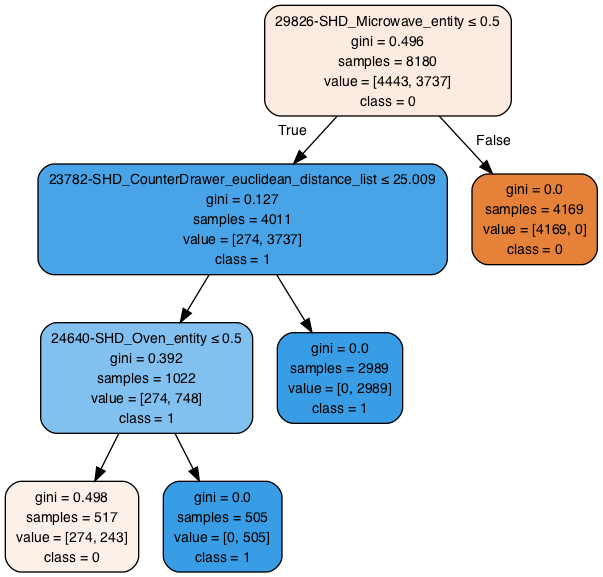

In [48]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())